In [ ]:
# 어제 한 거: 데이터 전처리 -> 숫자에서 $나 숫자 중 closed 빼거나 이런 거..! 

# 회귀제곱합 / 전체제곱합 : r square의 설명력
#다중공선성
#자기상관성 : 어제의 데이터가 오늘의 데이터에 영향을 미치고 오늘이 내일에 영향을 미침-> 시계열로 해야 함
# 시계열 : TimeSeries = AR( 자기상관성: 하나의 데이터에서 시간에 따른 상관성, 상관계수랑 수식은 같음. 데이터 변수가 다를 뿐
#          상관계수 : 2개, AR :1개) + MA(5일마다(?) 이동평균, 장기분석을 할 땐 120 .. -> 변동주파수를 없애기 위해서 )



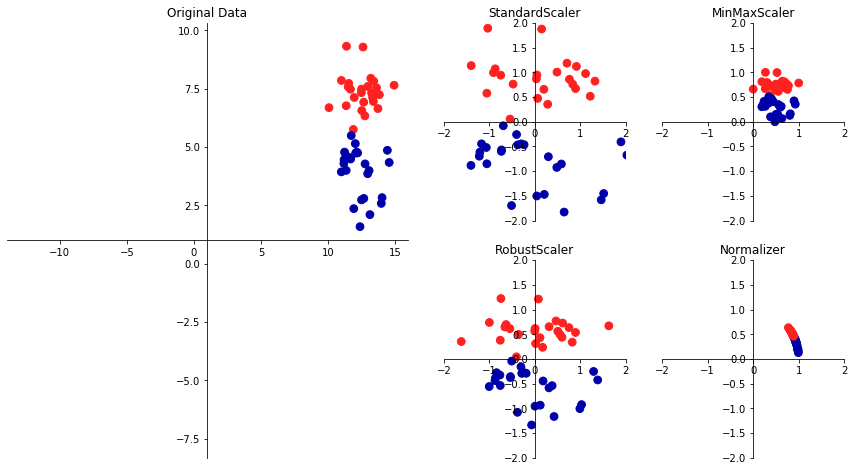

In [4]:
%matplotlib inline
import mglearn # 아나콘다 프롬프트에서 pip install로 설치
import matplotlib.pyplot as plt
mglearn.plots.plot_scaling()

# 스탠다드 : 집정수 데이터 - 평균 / 이 데이터의 표준편차
# 표준편차를 구하는 이유 : 중심으로부터 얼마나 이격되어 있는지 알기 위해

# 분석에서는 분산이 큰 거야 주성분.

# ★ 집정수 : (관측치 - 평균) / 표준편차 : 왜 표준편차로 나눌까?
# -> 표준화하기 위해서. 확률값을 알고 싶은데 표준정규분포 하나만 확률을 구해놨기 때문.
# 그걸로 나눠야 표준편차의 몇 배수에 있는지 확인할 수 있기 때문.

#민맥스스켈러 : 
#로버스트스켈러 : 사분위 안에서 표시 -> 스탠다드스켈러보다 범위가 줄어듦
#노말라이저 : 방향값만 표시 됨.

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [8]:
df.dropna() # 결측치 제거

,0,1,2
1,2.0,3.0,5


In [9]:
df.dropna(axis='columns') # axis='columns' -> nan이 있는 "열"을 지워라

,2
0,2
1,5
2,6


In [10]:
df[3] = np.nan

In [11]:
df.dropna(axis='columns', how='all') # how='all' : 모두가 nan이면, 삭제하라.

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [12]:
data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [13]:
data.fillna(0) # 결측치를 0으로 채워라

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [14]:
data.fillna(method='ffill') # forward fill : 결측치 이전의 값으로 Nan에 채워 넣어라

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [15]:
data.fillna(method='bfill') # backward fill : 결측치 다음의 값으로 Nan에 채워 넣어라

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

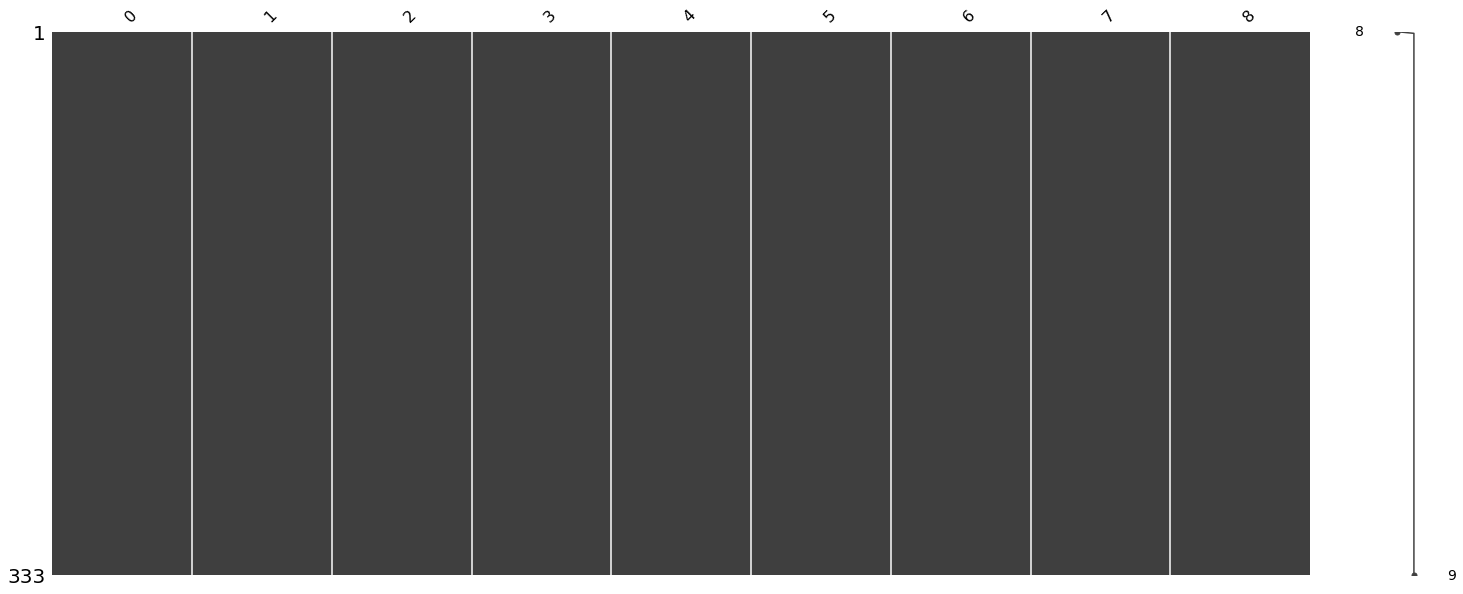

In [18]:
import missingno as msno # 아나콘다 프롬프트에서 설치
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('diab.csv', header=None)
msno.matrix(df)
plt.show()

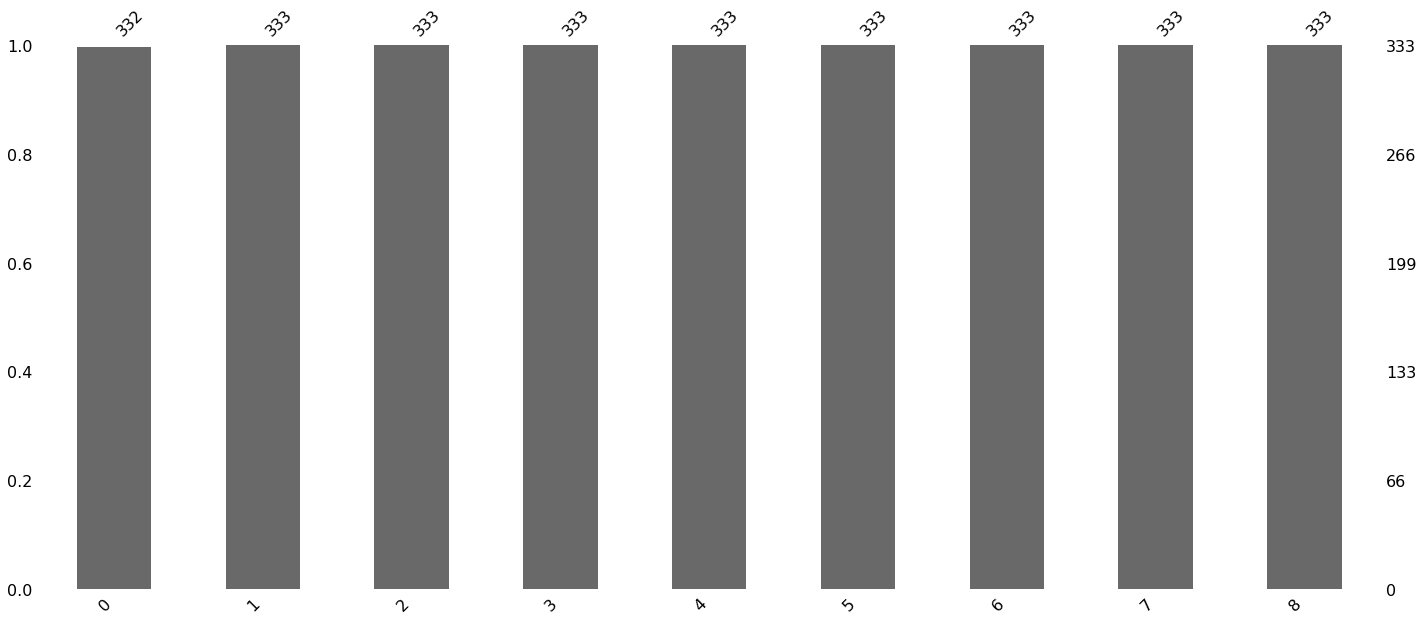

In [19]:
msno.bar(df)
plt.show() # 0번 인덱스 데이터만 332 -> 결측치가 있다.

In [20]:
df.dropna()

,0,1,2,3,4,5,6,7,8
1,1.0,6,148,72,35,33.6,0.627,50,Yes
2,2.0,1,85,66,29,26.6,0.351,31,No
3,3.0,1,89,66,23,28.1,0.167,21,No
4,4.0,3,78,50,32,31,0.248,26,Yes
5,5.0,2,197,70,45,30.5,0.158,53,Yes
...,...,...,...,...,...,...,...,...,...
328,328.0,2,88,58,26,28.4,0.766,22,No
329,329.0,9,170,74,31,44,0.403,43,Yes
330,330.0,10,101,76,48,32.9,0.171,63,No
331,331.0,5,121,72,23,26.2,0.245,30,No


In [30]:
df = pd.DataFrame({'value': np.random.randint(0,100,20)}) # 0에서 100사이의 값 20개로 데이터프레임 생성
print(df)

labels = ["{0} - {1}".format(i, i+9) for i in range(0,100,10)] # 10단위로 범위가 나눠짐.
print()
print(labels)

    value
0      54
1      52
2      96
3      31
4      64
5      47
6      29
7      56
8      45
9       5
10     25
11     57
12     20
13     22
14     75
15     22
16     84
17     30
18     93
19     27

['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99']


In [31]:
df['group'] = pd.cut(df.value, range(0,105,10), right=False, labels = labels)
# df.value를 잘라라(cut). 0에서 105 사이의 값을 10개씩. -> 0-9, 10-19, 20-29, 30-39, ... , 90-99, 100 (범위값 지정)
# 이 값에 따라서 문자열 라벨링을 해라. -> 범주 지정
# right = False : 오른쪽 끝 수는 제외하고 범주화 하라.

print(df)

    value    group
0      54  50 - 59
1      52  50 - 59
2      96  90 - 99
3      31  30 - 39
4      64  60 - 69
5      47  40 - 49
6      29  20 - 29
7      56  50 - 59
8      45  40 - 49
9       5    0 - 9
10     25  20 - 29
11     57  50 - 59
12     20  20 - 29
13     22  20 - 29
14     75  70 - 79
15     22  20 - 29
16     84  80 - 89
17     30  30 - 39
18     93  90 - 99
19     27  20 - 29


In [33]:
raw_cat = pd.Categorical(["a","b","c","a"], categories=["b","c","d"], ordered=False)
# Categorical = 범주화
# 정렬은 하지 않고(ordered=False), 카테고리는 b,c,d가 있는데 데이터들은 a,b,c,a가 있으니까 매치 안 되는 건 NaN.
raw_cat

[NaN, b, c, NaN]
Categories (3, object): [b, c, d]

In [35]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'], 'data1':range(6)})
print(df)
pd.get_dummies(df['key']) # key를 one-hot-encoding 함
# one-hot-encoding : 선형회귀에서 범주형 변수는 반드시 원핫인코딩을 실행해줘야 한다.
# ex) 연속형 + 범주형 데이터면 범주형 데이터는 반드시 !!!!! 원핫인코딩 하기!

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5


,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [45]:
from pandas import Series, DataFrame
# ↑를 쓰면 DataFrame 앞에 pd를 안 붙여도 됨 + 메모리를 효율적으로 사용할 수 있음


# dict의 키는 중복이 안 됨.
# 그런데 DataFrame는 dict의 중복을 허용하고 순서를 보장한다.
df1 = DataFrame({ 'key':['b','b','a','c','a','a','b'], 'data1':range(7)}) # <- 순서 보장됨.
print(df1)

df2 = DataFrame({'key':['a','b','d'], 'data2':range(3)})
print(df2)
print()
print(pd.merge(df1, df2, how='inner')) # df1과 df2 모두 있는 것만 => b,b,b,a,a 만 출력
print()

print(pd.merge(df1, df2, on='key')) # key 값이 일치는 것만 : a랑 b
print()

print(pd.merge(df1, df2, left_on='key', right_on = 'key')) # <- 이름이 다를 때 이렇게 지정해주면 됨.
print()

print(pd.merge(df1, df2, how='outer')) # 일치하지 않는 것도 모두 출력 -> 출력시 갯수가 늘어남

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

  key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0


In [48]:
# index에 이름(state, number)이 필요한 이유 : 계층적 인덱스를 생성하기 위해.
# => 층이 여러개니까 이름이 없으면 접근하기가 어려움. 그래서 그 층의 이름을 지정해 주는 것.

data = DataFrame(np.arange(6).reshape(2,3), index=pd.Index(['Ohio', 'Colorado'], name='state'),
                columns = pd.Index(['one','two','three'], name = 'number'))
# 2행 3열짜리 데이터프레임을 만드는데, 인덱스는 Ohio와 Colorado, 인덱스 변수의 이름은 state로 지정하고,
# 컬럼은 one, two, three고 컬럼의 변수 이름은 number로 지정한다.
print(data)

result = data.stack()
print("분리")
print(result) # stack을 만드는 이유 : 내가 원하는 대로 만들고 모양을 잡기 위해서.
# 데이터들은 모두 일직선으로 옴. R studio -> melt
print(result.unstack())

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
분리
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32
number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [ ]:
# 데이터가 중복이 일어날 수 있다!

In [49]:
data = pd.DataFrame({'k1':['one'] *3 + ['two']*4, 'k2':[1,1,2,3,3,4,4]})
# 리스트 one을 3번, two를 4번 반복
print(data)
print("중복")
print(data.duplicated()) # 중복 판단 -> 중복이면 True
print(data.drop_duplicates()) # 중복 제거 (* 원본을 제거하는 것 아님 )
# data = data.drop_duplicates() <- 하면 원본에 있는 데이터 제거. 근데 삭제하면 데이터 길이가 안 맞기 떄문에 에러가 남
data['v1'] = range(7) # v1이라는 변수를 새로 생성하고 0부터 6까지 숫자 넣음. 데이터 길이에 맞게 range(7)을 한 것.
print(data)

    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4
중복
0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool
    k1  k2
0  one   1
2  one   2
3  two   3
5  two   4
    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6


In [54]:
# 중복 제거
print(data.drop_duplicates(['k1'])) # 2개 : one이랑 two만 나옴
print(data.drop_duplicates(['k2'])) # 4개
print(data.drop_duplicates(['k1','k2'])) #포인터에 의해서 전달하기 때문에 리스트로 전달 //// 4개 
data.drop_duplicates(['k1','k2'], keep = 'last') # keep = 'last'

    k1  k2  v1
0  one   1   0
3  two   3   3
    k1  k2  v1
0  one   1   0
2  one   2   2
3  two   3   3
5  two   4   5
    k1  k2  v1
0  one   1   0
2  one   2   2
3  two   3   3
5  two   4   5


,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


In [55]:
data = Series([1.,-999.,2.,-999.,-1000.,3.])
print(data)

print("일정 데이터를 nan으로 ", data.replace(-999, np.nan)) # -999를 NaN으로 변경
print("변경", data.replace([-999, -1000], np.nan))          # -999와 -1000을 NaN으로 변경
print("짝으로",data.replace([-999,-1000], [np.nan,0]))      # -999를 NaN으로, -1000을 0으로 변경 <- 리스트 형식
print(data.replace({-999:np.nan, -1000:0})) # 범위 값 지정 -> -999는 np.nan으로, -1000는 0으로 변경 <- *키:데이터 형식

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64
일정 데이터를 nan으로  0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
변경 0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
짝으로 0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


In [71]:
data = DataFrame(np.arange(12).reshape((3,4)), index=['Ohio','Colorado','New York'], columns=['one','two','three','four'])

In [72]:
# 문제) index의 단어를 모두 대문자로 변경하시오. -> upper()

#data.index = data.index.map(str.upper) # 원본 인덱스 변경
data.index = data.index.str.upper() # map() 안 쓰고 인덱스 바꾸는 경우임
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [134]:
data.rename(index=str.title, columns=str.upper)
# titlecase : 첫자만 대문자로 바꿔주는 함수

#data

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [78]:
data.rename(index = {'OHIO':'Indiana'},columns={'three':'peekaboo'}) # 특정 인덱스만 수정하고 싶을 때 사용
# 위에서 아까 인덱스를 대문자로 지정해놨기 때문에 Ohio가 아니라 OHIO로 해야 함.

,one,two,peekaboo,four
Indiana,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [98]:
# 다음 데이터를 18~25, 25~35, 35~60, 60~100 사이의 값으로 범주화 하시오.
ages = [20,22,25,27,21,24,37,31,61,45,41,32]
bins = [18,25,35,60,100]

agedf = DataFrame({'age':ages}) # ages를 값으로 하는 age 변수를 생성하여 agedf라는 데이터프레임 생성

#agedf['group'] = pd.cut(agedf.age, aged, right=False, labels = ran)
# # agedf를 age를 기준으로 해서 나눌건데, 범위는 0부터 100까지 10단위로 자를 거고, 그 기준이 되는 건 ran임.

# agedf

In [102]:
cats = pd.cut(ages,bins) #오른쪽 포함
print("범주화한 데이터", cats)
# 범주화를 한다? => 숫자로 매핑한다. = 종류별로 숫자화한다. ( 눈에 보이는 건 문자로, 내부적으로는 숫자로 매핑하겠다. )

# 숫자를 어떻게 확인하느냐? ↓↓↓
print("code", cats.codes) # code [0 0 0 1 0 0 2 1 3 2 2 1]
print("범주의 종류는", cats.categories)

범주화한 데이터 [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
code [0 0 0 1 0 0 2 1 3 2 2 1]
범주의 종류는 IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')


In [104]:
# 문제) 범주별로 도수분포표를 작성하시오.
print("범주별로 카운트 한 결과", pd.value_counts(cats))

범주별로 카운트 한 결과 (18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64


In [239]:
olive = pd.read_csv("./olive.csv")
print(olive.head(5))
olive.dtypes
olive.describe()

       Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0  1.North-Apulia       1     1      1075           75      226   7823   
1  2.North-Apulia       1     1      1088           73      224   7709   
2  3.North-Apulia       1     1       911           54      246   8113   
3  4.North-Apulia       1     1       966           57      240   7952   
4  5.North-Apulia       1     1      1051           67      259   7771   

   linoleic  linolenic  arachidic  eicosenoic  
0       672         36         60          29  
1       781         31         61          29  
2       549         31         63          29  
3       619         50         78          35  
4       672         50         80          46  


,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.699301,4.599650,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902,16.281469
std,0.859968,2.356687,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250,14.083295
min,1.000000,1.000000,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000,2.000000
50%,1.000000,3.000000,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000,17.000000
75%,3.000000,7.000000,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000,28.000000
max,3.000000,9.000000,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000,58.000000


In [240]:
# 첫 번째 칼럼의 이름을 ID_area로 지정하시오.

# 실제 값을 변경할 때는 inplace = True
olive.rename(columns={olive.columns[0]:'ID_area'}, inplace = True)
olive.columns
olive.head(5)

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


###

# 비연속적 인덱스인 경우
bins = [(0,1),(5,7),(10,14)]
pd.IntervalIndex.from_tuples(bins, closed = closed)
x = pd.cut(array, _bins)




def cut(array, bins, labels, closed='right'):
    _bins = pd.IntervalIndex.from_tuples(bins, closed=closed)

    x = pd.cut(array, _bins)
    x.categories = labels
    return x

 

array = [3.5, 1, 0.5, 3]
bins = [(0,1), (1,2), (3,4)]
labels = ['first', 'second', 'third']

df = pd.DataFrame({
    'value': array,
    'category': cut(array, bins, labels, closed='right')
})
df 

In [241]:
# regions의 값들을 중복하지 않고 몇 개의 범주인지 확인하시오. - unique()
print(olive.region.unique())
print(olive.area.unique())

[1 2 3]
[1 2 3 4 5 6 9 7 8]


In [242]:
pd.crosstab(olive.area, olive.region) # area가 행, region이 열

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [243]:
# 처음 컬럼(ID_area)에 들어온 이상한 숫자를 제거하시오.
olive["ID_area"] = olive["ID_area"].apply(lambda x: x.split('.')[1])
# 점을 기준으로 뒤에 있는 것만 olive["ID_area"]에 담음.     * 점 기준 앞 => [0]
# lambda에서 x는 ID_area에 있는 데이터 하나

olive

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46
...,...,...,...,...,...,...,...,...,...,...,...
567,West-Liguria,3,8,1280,110,290,7490,790,10,10,2
568,West-Liguria,3,8,1060,100,270,7740,810,10,10,3
569,West-Liguria,3,8,1010,90,210,7720,970,0,0,2
570,West-Liguria,3,8,990,120,250,7750,870,10,10,2


In [244]:
# 산성관련성분인 'palmitic','palmitoleic','stearic','oleic','linoleic','linolenic','arachidic','eicosenoic'의 컬럼만 추려서
# 별도의 sub 데이터 프레임(변수이름=dfsub)을 생성하시오

acidlist = ['palmitic','palmitoleic','stearic','oleic','linoleic','linolenic','arachidic','eicosenoic']
dfsub = olive[acidlist]
dfsub.head()


# dfsub  = pd.DataFrame({'palmitic':olive.palmitic,'palmitoleic':olive.palmitoleic,
#                     'stearic':olive.stearic,'oleic':olive.oleic,'linoleic':olive.linoleic,'linolenic':olive.linolenic,
#                     'arachidic':olive.arachidic,'eicosenoic':olive.eicosenoic})
# dfsub

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1075,75,226,7823,672,36,60,29
1,1088,73,224,7709,781,31,61,29
2,911,54,246,8113,549,31,63,29
3,966,57,240,7952,619,50,78,35
4,1051,67,259,7771,672,50,80,46


In [245]:
# dfsub의 데이터를 모두 100으로 나누어 소수점으로 나타내시오.
# dfsub = dfsub / 100
# dfsub

# apply + lambda
dfsub = olive[acidlist].apply(lambda x: x/100.0)
olive[acidlist] = dfsub # 원본 데이터에 계산한 값을 다시 집어넣기

Text(0, 0.5, 'linolenic')

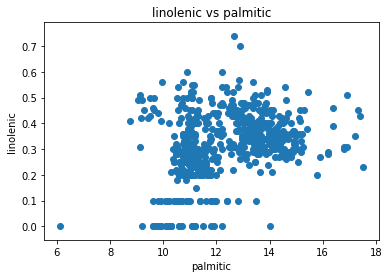

In [247]:
# palmitic산과 linolenic산의 분포도를 시각화 하시오.
# dfsub.palmitic.plot(legend=True)
# dfsub.linolenic.plot(legend=True)


fig = plt.figure()
plt.scatter(olive["palmitic"],olive["linolenic"])
axis = fig.gca()
axis.set_title('linolenic vs palmitic') # 표의 제목 지정
axis.set_xlabel('palmitic') # 표의 x축 라벨 지정
axis.set_ylabel('linolenic') # 표의 y축 라벨 지정

In [260]:
# groupby를 활용하여 region을 기준으로 묶어서 region_groupby 객체로 생성
region_groupby = olive.groupby(['region']) # groupby 객체기 때문에 눈으로 볼 수 없음 => 집계함수를 사용해야 함.
#region_groupby.mean()
region_groupby.apply(np.mean) # np.mean에 괄호 안 붙인 이유 : np.mean은 함수 주소를 주는 것이기 때문.
# 여러개를 조회할 땐 affFunc 사용
# lambda로 바꾸려면?
region_groupby.apply(lambda x: x.mean() ) # x = Series <- 얘는 함수를 직접 실행하는 거라서 괄호를 안 붙임.

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,,
1,1.0,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,2.0,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,3.0,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [253]:
# region_groupby에 describe() 메소드를 적용하여 출력해 보시오.
region_groupby.describe()

area                                              palmitic  \
        count      mean       std  min  25%  50%  75%  max    count   
region                                                                
1       323.0  2.783282  0.741054  1.0  2.5  3.0  3.0  4.0    323.0   
2        98.0  5.336735  0.475023  5.0  5.0  5.0  6.0  6.0     98.0   
3       151.0  8.006623  0.820542  7.0  7.0  8.0  9.0  9.0    151.0   

                   ... arachidic       eicosenoic                            \
             mean  ...       75%   max      count      mean       std   min   
region             ...                                                        
1       13.322879  ...     0.690  1.02      323.0  0.273220  0.083915  0.10   
2       11.113469  ...     0.810  1.05       98.0  0.019388  0.007436  0.01   
3       10.948013  ...     0.595  1.00      151.0  0.019735  0.007298  0.01   

                                 
         25%   50%    75%   max  
region                           
1       0.22  0.27  0.320  0.58  
2       0.01  0.02  0.020  0.03  
3       0.01  0.02  0.025  0.03  

[3 rows x 72 columns]